In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from fastai.text import *

path = "/content/drive/My Drive/DATA-475/imdb"

In [43]:
# create TextLMDataBunch using the csv in path
#     remember to specify the text column
data_lm = TextLMDataBunch.from_csv(
    path,
    "train.csv",
    text_cols="review"
)

In [ ]:
# create TextClasDataBunch using the csv in path
#     remember to specify the text/label column
#     specify test dataset, vocab, and bs
data_clas = TextClasDataBunch.from_csv(
    path,
    "train.csv",
    test="test.csv",
    text_cols="review",
    label_cols="sentiment",
    vocab=data_lm.train_ds.vocab,
    bs=32
)

In [ ]:
# create language model learner with AWD_LSTM architecture and drop_mult of 0.5
lm_learner = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-06
Min loss divided by 10: 6.92E-03


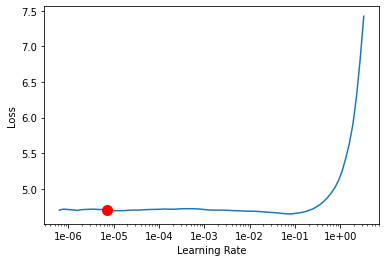

In [ ]:
# find a learing rate
lm_learner.lr_find()
lm_learner.recorder.plot(suggestion=True)

In [ ]:
# fit one cycle
lr = lm_learner.recorder.min_grad_lr
lm_learner.fit_one_cycle(1,lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.680662,4.458735,0.265092,08:00


In [ ]:
# save the encoder
lm_learner.save_encoder("model")

In [ ]:
lm_learner.predict("this movie talks about Canadian", n_words=20)

'this movie talks about Canadian speech how it attend to the delight of local people . The prince banning the speech is his only'

In [ ]:
clas_learner = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
clas_learner.load_encoder("model")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (19999 items)
x: TextList
xxbos xxmaj what an amazingly funny and original show . xxmaj the cast starting with the hysterical xxmaj julie xxunk xxmaj queen 's xxmaj got a xxmaj gun ) is just perfect . xxmaj add xxmaj amy xxunk xxmaj american xxmaj girl - xxmaj grandma xxmaj kim ) who plays a lesbian who is always arguing with her partner and business xxunk restaurant - xxup wok - xxup don"t xxup run ) i have laughed harder during this show than any other i have ever xxunk xxmaj newhart - one of my all time favorite shows ) xxmaj if you like movies like xxmaj naked xxmaj gun and xxmaj xxunk you will love this series ! ! xxmaj one of the best moments of the show is xxmaj cindy xxmaj williams playing herself . xxmaj when she xxunk xxmaj tammy at the dry cleaners , xxmaj tammy finds a picture of xxmaj cindy xxmaj williams in her coat . xxmaj the picture is of xxmaj cindy xxmaj williams doing an unmentionable act with a bowling pin - upsi

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.74E-02


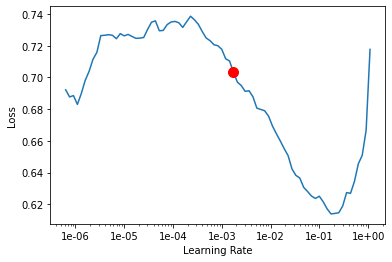

In [ ]:
# tune the text_classifier_learner to accpetable accuracy (>80%)
clas_learner.lr_find()
clas_learner.recorder.plot(suggestion=True)

In [ ]:
lr = clas_learner.recorder.min_grad_lr
clas_learner.fit_one_cycle(1,lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.457540,0.393880,0.825235,02:54


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-08


epoch,train_loss,valid_loss,accuracy,time
0,0.456462,0.395454,0.821636,03:23


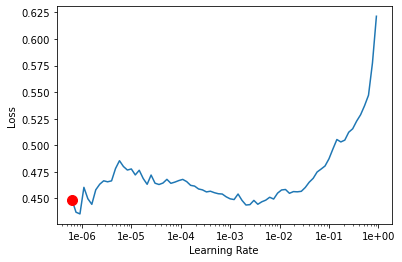

In [ ]:
clas_learner.freeze_to(-2)
clas_learner.lr_find()
clas_learner.recorder.plot(suggestion=True)
lr = clas_learner.recorder.min_grad_lr
clas_learner.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 4.79E-07


epoch,train_loss,valid_loss,accuracy,time
0,0.446593,0.394998,0.825235,03:21


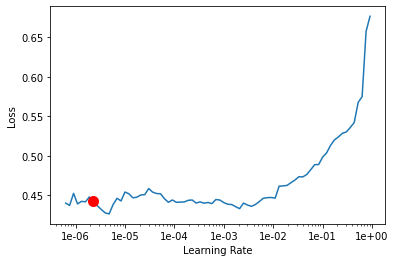

In [ ]:
clas_learner.freeze_to(-2)
clas_learner.lr_find()
clas_learner.recorder.plot(suggestion=True)
lr = clas_learner.recorder.min_grad_lr
clas_learner.fit_one_cycle(1, lr)

In [ ]:
clas_learner.predict("This is a horrible movie.")

(Category tensor(1), tensor(1), tensor([0.1198, 0.8802]))

In [ ]:
clas_learner.predict("This is a great movie,")

(Category tensor(1), tensor(1), tensor([7.7768e-04, 9.9922e-01]))

In [ ]:
# Check the label mapping
# suppose it returns {'negative': 0, 'positive': 1}
data_clas.train_ds.y.c2i

{'negative': 0, 'positive': 1}

In [40]:
import pandas as pd


df = pd.read_csv(path+"/test.csv")
y_true = tensor(df["sentiment"]=="positive")

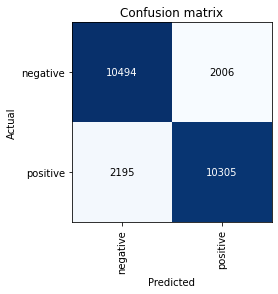

In [ ]:
interp = TextClassificationInterpretation.from_learner(
    clas_learner, 
    ds_type=DatasetType.Test
)
interp.y_true = tensor(df["sentiment"]=="positive")
interp.plot_confusion_matrix()

In [ ]:
from fastai.metrics import accuracy

accuracy(interp.preds, interp.y_true)

tensor(0.8313)